In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
from cloudy_fit_lib import *
from scipy.interpolate import RegularGridInterpolator
import pickle
from astropy import constants, units

In [2]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

In [3]:
rootdir = ''

Obtain the UVB grids for HM05, HM12, and FG20

In [4]:
# Isolate data form HM05, HM12, FG20
hm05_z_grid, hm05_wav_grid, hm05_J_nu_grid = read_uvb(rootdir, 'hm05_galaxy.ascii')
hm12_z_grid, hm12_wav_grid, hm12_J_nu_grid = read_uvb(rootdir, 'hm12_galaxy.ascii')
ks19_z_grid, ks19_wav_grid, ks19_J_nu_grid = read_uvb(rootdir, 'ks19_q18.ascii')
fg20_z_grid, fg20_wav_grid, fg20_J_nu_grid = read_uvb(rootdir, 'fg20_galaxy.ascii')

Compare calibration to Fakhri's 2018 paper

In [5]:
z_test = 0.4

# Fetch SEDs
hm05_J_nu_test = fetch_sed(z_test, hm05_z_grid, hm05_J_nu_grid)

In [6]:
np.log10(calc_U(hm05_wav_grid, hm05_J_nu_test, 1))

-5.4542699846341245

In [7]:
np.log10(calc_U(hm05_wav_grid, hm05_J_nu_test, 0.01))

-3.454269984634125

In [8]:
#constants.c.value*constants.Ryd.value

In [9]:
z_test = 0.4

# Fetch SEDs
hm12_J_nu_test = fetch_sed(z_test, hm12_z_grid, hm12_J_nu_grid)

# Invert the density for the threshold ionization parameter
#hm12_n_th_grid = calc_n_H(hm12_wav_grid, hm12_J_nu_test, U_th)

In [10]:
np.log10(calc_U(hm12_wav_grid, hm12_J_nu_test, 1))

-5.8637348270216565

In [11]:
np.log10(calc_U(hm12_wav_grid, hm12_J_nu_test, 0.01))

-3.863734827021657

Conversions for CUBS-VI

In [12]:
z_test = 1.0

# Fetch SEDs
hm05_J_nu_test = fetch_sed(z_test, hm05_z_grid, hm05_J_nu_grid)
fg20_J_nu_test = fetch_sed(z_test, fg20_z_grid, fg20_J_nu_grid)

In [29]:
np.log10(calc_n_H(fg20_wav_grid, fg20_J_nu_test, calc_U(hm05_wav_grid, hm05_J_nu_test, 10**(-3.12))))

-3.2043637369486313

In [7]:
np.log10(calc_U(hm05_wav_grid, hm05_J_nu_test, 0.01))

-3.454269984634125

In [8]:
#constants.c.value*constants.Ryd.value

In [9]:
z_test = 0.4

# Fetch SEDs
hm12_J_nu_test = fetch_sed(z_test, hm12_z_grid, hm12_J_nu_grid)

# Invert the density for the threshold ionization parameter
#hm12_n_th_grid = calc_n_H(hm12_wav_grid, hm12_J_nu_test, U_th)

In [10]:
np.log10(calc_U(hm12_wav_grid, hm12_J_nu_test, 1))

-5.8637348270216565

In [11]:
np.log10(calc_U(hm12_wav_grid, hm12_J_nu_test, 0.01))

-3.863734827021657

Compare HM12 ionizing photon densities

In [12]:
z_test_grid = np.array([0, 0.5, 1, 2, 3])

In [13]:
n_gamma_grid = np.zeros(len(z_test_grid))

In [14]:
for i in range(len(z_test_grid)):
    
    z_test = z_test_grid[i]
    
    hm12_J_nu_test = fetch_sed(z_test, hm12_z_grid, hm12_J_nu_grid)

    n_gamma_grid[i] = calc_n_H(hm12_wav_grid, hm12_J_nu_test, 1)

In [15]:
n_gamma_grid

array([3.11222727e-07, 1.67080799e-06, 4.96195152e-06, 1.20953907e-05,
       1.00636226e-05])

In [16]:
n_gamma_grid_G17 = np.array([4.2e-6, 2.2e-5, 7.8e-5, 1.6e-4, 1.4e-4])

In [17]:
n_gamma_grid_G17/n_gamma_grid

array([13.49515838, 13.16728201, 15.71962155, 13.22817956, 13.91149153])

Calculate ionization parameter for $n_\mathrm{H} = 10^{-5}$

In [18]:
z_test = 0

# Fetch SEDs
hm05_J_nu_test = fetch_sed(z_test, hm05_z_grid, hm05_J_nu_grid)
hm12_J_nu_test = fetch_sed(z_test, hm12_z_grid, hm12_J_nu_grid)
ks19_J_nu_test = fetch_sed(z_test, ks19_z_grid, ks19_J_nu_grid)
fg20_J_nu_test = fetch_sed(z_test, fg20_z_grid, fg20_J_nu_grid)

# Get threshold ionization parameters
hm05_U_th = calc_U(hm05_wav_grid, hm05_J_nu_test, 1e-5)
hm12_U_th = calc_U(hm12_wav_grid, hm12_J_nu_test, 1e-5)
ks19_U_th = calc_U(ks19_wav_grid, ks19_J_nu_test, 1e-5)
fg20_U_th = calc_U(fg20_wav_grid, fg20_J_nu_test, 1e-5)

In [19]:
hm05_U_th, hm12_U_th, ks19_U_th, fg20_U_th

(0.09731892306976635,
 0.03112227274925912,
 0.05354208648589811,
 0.04202585639547854)

Calculate density scaling for all radiation fields

In [20]:
hm05_n_th_grid = np.zeros(len(hm05_z_grid))
hm12_n_th_grid = np.zeros(len(hm12_z_grid))
ks19_n_th_grid = np.zeros(len(ks19_z_grid))
fg20_n_th_grid = np.zeros(len(fg20_z_grid))

In [21]:
for i in range(len(hm05_n_th_grid)):
    
    z_test = hm05_z_grid[i]
    
    hm05_J_nu_test = fetch_sed(z_test, hm05_z_grid, hm05_J_nu_grid)

    hm05_n_th_grid[i] = calc_n_H(hm05_wav_grid, hm05_J_nu_test, hm12_U_th)

In [22]:
for i in range(len(hm12_n_th_grid)):
    
    z_test = hm12_z_grid[i]
    
    hm12_J_nu_test = fetch_sed(z_test, hm12_z_grid, hm12_J_nu_grid)

    hm12_n_th_grid[i] = calc_n_H(hm12_wav_grid, hm12_J_nu_test, hm12_U_th)

In [23]:
for i in range(len(ks19_n_th_grid)):
    
    z_test = ks19_z_grid[i]
    
    ks19_J_nu_test = fetch_sed(z_test, ks19_z_grid, ks19_J_nu_grid)

    ks19_n_th_grid[i] = calc_n_H(ks19_wav_grid, ks19_J_nu_test, ks19_U_th)

In [24]:
for i in range(len(fg20_n_th_grid)):
    
    z_test = fg20_z_grid[i]
    
    fg20_J_nu_test = fetch_sed(z_test, fg20_z_grid, fg20_J_nu_grid)

    fg20_n_th_grid[i] = calc_n_H(fg20_wav_grid, fg20_J_nu_test, hm12_U_th)

Make the plot

Text(0, 0.5, '$n_\\mathrm{H, th} (U_{\\mathrm{th, HM12}, Z \\gtrsim Z_\\odot})$')

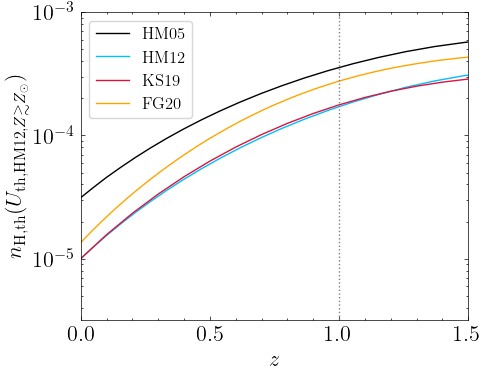

In [25]:
fig, ax = plt.subplots(1, figsize=(5,4))

ax.plot(hm05_z_grid, hm05_n_th_grid, label='HM05')
ax.plot(hm12_z_grid, hm12_n_th_grid, label='HM12')
ax.plot(ks19_z_grid, ks19_n_th_grid, label='KS19')
ax.plot(fg20_z_grid, fg20_n_th_grid, label='FG20')

ax.axvline(1, linestyle=':', color='gray')

ax.set_xlim(0, 1.5)
ax.set_ylim(10**-5.5, 10**-3)
#ax.set_ylim(10**-5, 10**-3)

ax.legend()

ax.set_yscale('log')

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$n_\mathrm{H, th} (U_{\mathrm{th, HM12}, Z \gtrsim Z_\odot})$')

Calculate ionization parameter for $n_\mathrm{H} = 10^{-3}$

In [26]:
z_test = 0

# Fetch SEDs
hm05_J_nu_test = fetch_sed(z_test, hm05_z_grid, hm05_J_nu_grid)
hm12_J_nu_test = fetch_sed(z_test, hm12_z_grid, hm12_J_nu_grid)
ks19_J_nu_test = fetch_sed(z_test, ks19_z_grid, ks19_J_nu_grid)
fg20_J_nu_test = fetch_sed(z_test, fg20_z_grid, fg20_J_nu_grid)

# Get threshold ionization parameters
hm05_U_th = calc_U(hm05_wav_grid, hm05_J_nu_test, 1e-3)
hm12_U_th = calc_U(hm12_wav_grid, hm12_J_nu_test, 1e-3)
ks19_U_th = calc_U(ks19_wav_grid, ks19_J_nu_test, 1e-3)
fg20_U_th = calc_U(fg20_wav_grid, fg20_J_nu_test, 1e-3)

In [27]:
hm05_U_th, hm12_U_th, ks19_U_th, fg20_U_th

(0.0009731892306976635,
 0.00031122272749259123,
 0.0005354208648589812,
 0.00042025856395478545)

Calculate density scaling for all radiation fields

In [28]:
hm05_n_th_grid = np.zeros(len(hm05_z_grid))
hm12_n_th_grid = np.zeros(len(hm12_z_grid))
ks19_n_th_grid = np.zeros(len(ks19_z_grid))
fg20_n_th_grid = np.zeros(len(fg20_z_grid))

In [29]:
for i in range(len(hm05_n_th_grid)):
    
    z_test = hm05_z_grid[i]
    
    hm05_J_nu_test = fetch_sed(z_test, hm05_z_grid, hm05_J_nu_grid)

    hm05_n_th_grid[i] = calc_n_H(hm05_wav_grid, hm05_J_nu_test, hm12_U_th)

In [30]:
for i in range(len(hm12_n_th_grid)):
    
    z_test = hm12_z_grid[i]
    
    hm12_J_nu_test = fetch_sed(z_test, hm12_z_grid, hm12_J_nu_grid)

    hm12_n_th_grid[i] = calc_n_H(hm12_wav_grid, hm12_J_nu_test, hm12_U_th)

In [31]:
for i in range(len(ks19_n_th_grid)):
    
    z_test = ks19_z_grid[i]
    
    ks19_J_nu_test = fetch_sed(z_test, ks19_z_grid, ks19_J_nu_grid)

    ks19_n_th_grid[i] = calc_n_H(ks19_wav_grid, ks19_J_nu_test, ks19_U_th)

In [32]:
for i in range(len(fg20_n_th_grid)):
    
    z_test = fg20_z_grid[i]
    
    fg20_J_nu_test = fetch_sed(z_test, fg20_z_grid, fg20_J_nu_grid)

    fg20_n_th_grid[i] = calc_n_H(fg20_wav_grid, fg20_J_nu_test, hm12_U_th)

Make the plot

Text(0, 0.5, '$n_\\mathrm{H, th} (U_{\\mathrm{th}, Z \\lesssim 0.1 Z_\\odot})$')

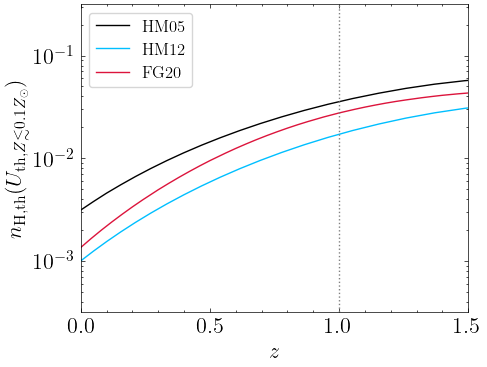

In [33]:
fig, ax = plt.subplots(1, figsize=(5,4))

ax.plot(hm05_z_grid, hm05_n_th_grid, label='HM05')
ax.plot(hm12_z_grid, hm12_n_th_grid, label='HM12')
ax.plot(fg20_z_grid, fg20_n_th_grid, label='FG20')

ax.axvline(1, linestyle=':', color='gray')

ax.set_xlim(0, 1.5)
ax.set_ylim(10**-3.5, 10**-0.5)
#ax.set_ylim(10**-5, 10**-3)

ax.legend()

ax.set_yscale('log')

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$n_\mathrm{H, th} (U_{\mathrm{th}, Z \lesssim 0.1 Z_\odot})$')

Convert density to $U$ for various UVBs

In [34]:
z_test = 1

# Fetch SEDs
hm05_J_nu_test = fetch_sed(z_test, hm05_z_grid, hm05_J_nu_grid)
hm12_J_nu_test = fetch_sed(z_test, hm12_z_grid, hm12_J_nu_grid)
ks19_J_nu_test = fetch_sed(z_test, ks19_z_grid, ks19_J_nu_grid)
fg20_J_nu_test = fetch_sed(z_test, fg20_z_grid, fg20_J_nu_grid)

In [35]:
# Get ionization parameter for FG20, various densities
fg20_U_hdens_2 = calc_U(fg20_wav_grid, fg20_J_nu_test, 1e-2)
fg20_U_hdens_3 = calc_U(fg20_wav_grid, fg20_J_nu_test, 1e-3)
fg20_U_hdens_4 = calc_U(fg20_wav_grid, fg20_J_nu_test, 1e-4)

In [36]:
np.log10(fg20_U_hdens_2), np.log10(fg20_U_hdens_3), np.log10(fg20_U_hdens_4)

(-3.065954808954892, -2.065954808954892, -1.0659548089548923)

Convert these $U$ values to densities for other radiation fields

KS19

In [37]:
ks19_hdens_2 = calc_n_H(ks19_wav_grid, ks19_J_nu_test, fg20_U_hdens_2)
ks19_hdens_3 = calc_n_H(ks19_wav_grid, ks19_J_nu_test, fg20_U_hdens_3)
ks19_hdens_4 = calc_n_H(ks19_wav_grid, ks19_J_nu_test, fg20_U_hdens_4)

In [38]:
np.log10(ks19_hdens_2), np.log10(ks19_hdens_3), np.log10(ks19_hdens_4)

(-1.957350820216396, -2.957350820216396, -3.957350820216396)

HM12

In [39]:
hm12_hdens_2 = calc_n_H(hm12_wav_grid, hm12_J_nu_test, fg20_U_hdens_2)
hm12_hdens_3 = calc_n_H(hm12_wav_grid, hm12_J_nu_test, fg20_U_hdens_3)
hm12_hdens_4 = calc_n_H(hm12_wav_grid, hm12_J_nu_test, fg20_U_hdens_4)

In [40]:
np.log10(hm12_hdens_2), np.log10(hm12_hdens_3), np.log10(hm12_hdens_4)

(-2.2383926746459624, -3.2383926746459624, -4.238392674645962)

Visualize

Text(0, 0.5, '$\\log (n_\\mathrm{H}/\\mathrm{cm}^{-3})$')

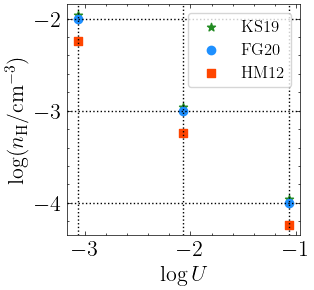

In [45]:
fig, ax = plt.subplots(1, figsize=(3,3))

ax.axhline(-2, linestyle=':')
ax.axhline(-3, linestyle=':')
ax.axhline(-4, linestyle=':')

ax.axvline(-3.07, linestyle=':')
ax.axvline(-2.07, linestyle=':')
ax.axvline(-1.07, linestyle=':')


ax.scatter([np.log10(fg20_U_hdens_2), np.log10(fg20_U_hdens_3), np.log10(fg20_U_hdens_4)],
           [np.log10(ks19_hdens_2), np.log10(ks19_hdens_3), np.log10(ks19_hdens_4)], label='KS19',
          color='forestgreen', marker='*')


ax.scatter([np.log10(fg20_U_hdens_2), np.log10(fg20_U_hdens_3), np.log10(fg20_U_hdens_4)],
           [-2, -3, -4], label='FG20', color='dodgerblue')

ax.scatter([np.log10(fg20_U_hdens_2), np.log10(fg20_U_hdens_3), np.log10(fg20_U_hdens_4)],
           [np.log10(hm12_hdens_2), np.log10(hm12_hdens_3), np.log10(hm12_hdens_4)], label='HM12', 
           color='orangered', marker='s')


ax.legend()
#ax.set_title(r'$z=1$')
ax.set_xlabel(r'$\log U$')
ax.set_ylabel(r'$\log (n_\mathrm{H}/\mathrm{cm}^{-3})$')